import numpy as np
import pandas as pd
import sklearn
print('The current panda version is {}.'.format(pd.__version__))
print('The current scikit-learn version is {}.'.format(sklearn.__version__))
#panda=float(pd.__version__[0:4])
#sklearn=float(sklearn.__version__[0:4])
if float(pd.__version__[0:4])<0.24:
    !pip install --upgrade pandas
    print('PANDA package upgraded successfully')
if float(sklearn.__version__[0:4])<0.20:
    !pip install --upgrade scikit-learn
    print('SKLEARN package upgraded successfully')

import numpy as np
import pandas as pd 
import sklearn
print(pd.__version__)
print(sklearn.__version__)

In [1]:
## IMPORTING RESOURCES AND LIBRARIES--------------------------------------------------------------------------------------------------
import numpy as np                                                   #- Importing NUMPY Library
import pandas as pd                                                  #- Importing PANDAS Library
from sklearn.datasets import load_iris                               #- Dataset Lib.
from sklearn.preprocessing import StandardScaler                     #- SKLEARN Standard Scaler
from sklearn.linear_model import LogisticRegression                  #- SKLEARN LogisticRegression
from sklearn.tree import DecisionTreeClassifier                      #- SKLEARN DecisionTreeClassifier     
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #- SKLEARN Linear Discriminant Analysis [LDA]
from sklearn.decomposition import PCA                                #- SKLEARN Principal Component Analysis [PCA]
from sklearn.decomposition import KernelPCA                          #- SKLEARN Kernel Principal Component Analysis [KPCA]
from sklearn.svm import SVC                                          #- SKLEARN SVC
from sklearn.neighbors import KNeighborsClassifier                   #- SKLEARN KNeighborsClassifier
from sklearn import metrics                                          #- SKLEARN metrics
from sklearn import model_selection                                  #- SKLEARN model_selection
from sklearn.model_selection import train_test_split                 #- SKLEARN train_test_split
from sklearn.naive_bayes import GaussianNB                           #- SKLEARN Gaussian Naive Bayes
from sklearn.model_selection import cross_val_score                  #- SKLEARN cross_val_score
import matplotlib.pyplot as plt                                      #- MATPLOTLIB for the graphs 
#%matplotlib inline                                                  #- INLINE resource for line plots
from sklearn.pipeline import make_pipeline                           #- SKLEARN resource for pipeline
from sklearn.ensemble import RandomForestClassifier                  #- SKLEARN resource for RandomForestClassifier
##------------------------------------------------------------------------------------------------------------------------------------
import subprocess
import sys

reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==')[0] for r in reqs.split()]
#print(installed_packages)

if 'mlxtend' not in installed_packages:
    !pip install mlxtend                                              #- Adding mlxtend Package
    print('mlxtend installed successfully')

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from mlxtend.classifier import EnsembleVoteClassifier
#from mlxtend.plotting import plot_decision_regions
import warnings
##------------------------------------------------------------------------------------------------------------------------------------

In [2]:
# If you want to get the data from the website.
data = 'risk_factors_cervical_cancer.csv'

#Data on the loal drive.
df = pd.read_csv(data)

In [3]:
print('Shape of the dataframe:', df.shape)

df.head()

Shape of the dataframe: (858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
# Replacing the ? with a NaN value
df.replace('?', np.nan, inplace=True)

df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
# We have a lot of null values in the dataset.
#df.isnull().sum()  # No nulls, just NaN
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [6]:
# Here we drop the columns where 90% or more of the columns are NaN values.
thresh = df.shape[0]*.90
df.dropna(axis=1,thresh=thresh,inplace=True)

print('Shape after transformation : ', df.shape)  
# New shape after dropping the columns. We went from 36 columns down to 16

Shape after transformation :  (858, 16)


In [7]:
# Now we need to eliminate the NaN values left in the dataset. As you can see with this filter there are quite a lot of rows.
df.where(df['First sexual intercourse'].isna()).head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# This is just the top of the file so we can compare it in the next few steps as we impute the data with the mean
# value of the dataset column.
df.dropna(axis=0, inplace=True)
df = df.reset_index(drop=True)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,52,5.0,16.0,4.0,1.0,37.0,37.0,0,1,0,1,0,0,0,0,0
3,46,3.0,21.0,4.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
4,42,3.0,23.0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [10]:
# Seperate the data by feature and class
#y = df[['Hinselmann','Schiller','Citology','Biopsy']] #< We have 4 target columns.

y = df[['Hinselmann']]  # <<< In this example we are only going to use one target variable. We happen to choose Hinselmann.
X = df.iloc[:,:-4]


# Now we will take a look at the rows which contain NaN values and have NaN and  use the "mean" to fill in the values.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan)
imputed_X = pd.DataFrame(imp.fit_transform(X))
imputed_X.columns = X.columns
imputed_X.index = X.index

In [13]:
# Showing the shape of the data before we place it into the machine learning pipeline.
print('Columns before split : ',str(df.shape[1]))
print('X columns after split: ',str(imputed_X.shape[1]))
print('y columns after split:  ',str(y.shape[1]))
print('Total rows in dataset:', str(y.shape[0]))

Columns before split :  16
X columns after split:  12
y columns after split:   1
Total rows in dataset: 761


## We achieved 96% Accuracy on our predictive model using PCS and Logistic Regression

In [24]:
## Split the data in to test and training sets. 
## X will be the imputed data that no longer has the NaN values.
## y will be the Hinselmann target since we do not know if PCA can predict on 4 targets. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imputed_X, y,test_size=0.20,stratify=y,random_state=1)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA               ## Transformer
from sklearn.linear_model import LogisticRegression ## Estimator

#Running items into the pipeline
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train.values.ravel())
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test.values.ravel()))

Test Accuracy: 0.961


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Sequential Feature Selection - Forward

In [64]:
# Build RF classifier to use in feature selection   # REF. -https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
                                                    # REF. -https://www.kdnuggets.com/2018/06/step-forward-feature-selection-python.html
sc2=StandardScaler()    
X_std = sc2.fit_transform(imputed_X)
    
clf = KNeighborsClassifier(n_neighbors=5)

# Build step forward feature selection
mysfs1 = sfs(clf,k_features=3,forward=True,floating=False,verbose=0,scoring='accuracy',cv=5)


# Perform SFFS
mysfs1 = mysfs1.fit(X_std, y.values.ravel())

# Which features?
#feat_cols = list(mysfs1.k_feature_idx_)
#print(mysfs1.k_feature_idx_)
print(mysfs1.k_feature_names_)

#pd.DataFrame.from_dict(mysfs1.get_metric_dict()).T

#Handle Warnings
#import warnings
#warnings.filterwarnings('ignore')

('0', '1', '2')


### Sequential Feature Selection - Backward

In [65]:
# Build RF classifier to use in feature selection   # REF. -https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
                                                    # REF. -https://www.kdnuggets.com/2018/06/step-forward-feature-selection-python.html
clf = KNeighborsClassifier(n_neighbors=5)

# Build step forward feature selection
mysfs1 = sfs(clf,k_features=3,forward=False,floating=False,verbose=0,scoring='accuracy',cv=5)

# Perform SFFS
mysfs1 = mysfs1.fit(X_std, y.values.ravel())

# Which features?
#feat_cols = list(mysfs1.k_feature_idx_)
#print(mysfs1.k_feature_idx_)
print(mysfs1.k_feature_names_)

#pd.DataFrame.from_dict(mysfs1.get_metric_dict()).T

#Handle Warnings
#import warnings
#warnings.filterwarnings('ignore')

('1', '3', '10')


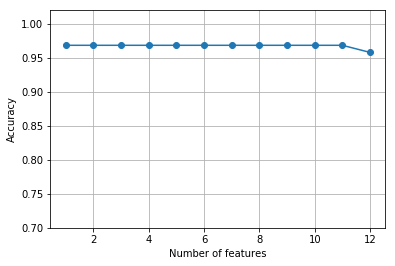

In [66]:
from sklearn.base import clone 
from itertools import combinations 
import numpy as np 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train, X_test, y_test,indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
    
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier() 
sbs = SBS(knn, k_features=1) 
sbs.fit(X_std, y.values.ravel()) 

k_feat = [len(k) for k in sbs.subsets_] 
plt.plot(k_feat, sbs.scores_, marker='o') 
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

### Assessing feature importance with random Forests

 1) Age                            0.346035
 2) First sexual intercourse       0.184143
 3) Num of pregnancies             0.146007
 4) Number of sexual partners      0.110240
 5) STDs: Number of diagnosis      0.062340
 6) Smokes (years)                 0.051129
 7) Smokes (packs/year)            0.042855
 8) Dx:HPV                         0.019030
 9) Dx:Cancer                      0.018378
10) Smokes                         0.010143
11) Dx                             0.009402
12) Dx:CIN                         0.000297


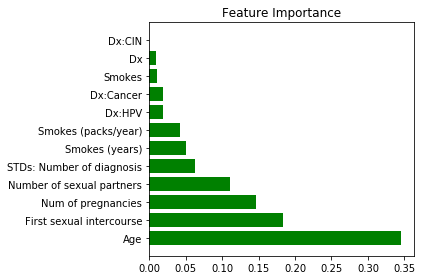

In [42]:
feat_labels=X.columns.values

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(imputed_X,y.values.ravel())
importances=forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(imputed_X.shape[1]):
    print("%2d) % -*s %f" %(f +1 , 30,feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')    

#plt.bar(range(X.shape[1]),importances[indices],align='center')
#plt.xticks(range(X.shape[1]),feat_labels[indices],rotation=90)
#plt.xlim([-1,X.shape[1]])

plt.barh(range(imputed_X.shape[1]),importances[indices],align='center',color='green')
plt.yticks(range(imputed_X.shape[1]),feat_labels[indices])
plt.ylim([-1,imputed_X.shape[1]])

plt.tight_layout()
plt.show()

### Scores per algorithm using PCA Dimensionality Reduction Method

In [32]:
# prepare configuration for cross validation test harness   # REF. -https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
# prepare models

models = []
models.append(('Logistic Regression        [LR]   ', LogisticRegression(random_state=1)))
models.append(('Logistic Regression(Reg.L1)[LR-l1]', LogisticRegression(penalty='l1',random_state=1)))
models.append(('Logistic Regression(Reg.L2)[LR-l2]', LogisticRegression(penalty='l2',random_state=1)))
models.append(('Decision Tree Classifier   [DT]   ', DecisionTreeClassifier(random_state=1)))
models.append(('Support Vector Classifier  [SVC]  ', SVC(kernel = 'linear',random_state=1)))
models.append(('Kernel SVC                 [KSVC] ', SVC(kernel = 'rbf', random_state=1)))
models.append(('KNeighbors Classifier      [KNN]  ', KNeighborsClassifier(n_neighbors=5)))
models.append(('GaussianNB                 [GNB]  ', GaussianNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=5)
    pipe_lr= make_pipeline(StandardScaler(),PCA(n_components=2),model)
    cv_results = cross_val_score(pipe_lr,imputed_X,y,scoring=scoring,cv=kfold,n_jobs=-1)
    #results.append(cv_results)
    names.append(name)
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

Logistic Regression        [LR]   : 0.960595 
Logistic Regression(Reg.L1)[LR-l1]: 0.960595 
Logistic Regression(Reg.L2)[LR-l2]: 0.960595 
Decision Tree Classifier   [DT]   : 0.943506 
Support Vector Classifier  [SVC]  : 0.960595 
Kernel SVC                 [KSVC] : 0.960595 
KNeighbors Classifier      [KNN]  : 0.960595 
GaussianNB                 [GNB]  : 0.934296 


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


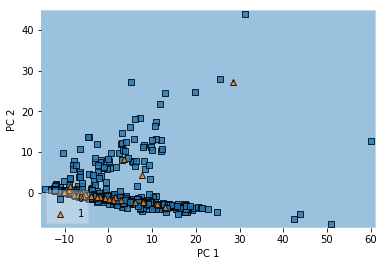

In [59]:
from mlxtend.plotting import plot_decision_regions

clf1 = SVC(kernel = 'rbf', random_state=1)
pca = PCA(n_components=2)
X2 = pca.fit_transform(imputed_X)
clf1.fit(X2, y.values.ravel())

plot_decision_regions(X2, y.values.ravel(), clf=clf1, legend=3)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### Scores per algorithm using LDA Dimensionality Reduction Method

In [34]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=5)
    pipe_lr= make_pipeline(StandardScaler(),LinearDiscriminantAnalysis(n_components=2),model)
    cv_results = cross_val_score(pipe_lr,imputed_X,y,scoring=scoring,cv=kfold,n_jobs=-1)
    #results.append(cv_results)
    names.append(name)
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

Logistic Regression        [LR]   : 0.959279 
Logistic Regression(Reg.L1)[LR-l1]: 0.959279 
Logistic Regression(Reg.L2)[LR-l2]: 0.959279 
Decision Tree Classifier   [DT]   : 0.923770 
Support Vector Classifier  [SVC]  : 0.960595 
Kernel SVC                 [KSVC] : 0.960595 
KNeighbors Classifier      [KNN]  : 0.952700 
GaussianNB                 [GNB]  : 0.947454 


### Scores per algorithm using KPCA Dimensionality Reduction Method

In [33]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=5)
    pipe_lr= make_pipeline(StandardScaler(),KernelPCA(n_components=2, kernel='rbf'),model)
    cv_results = cross_val_score(pipe_lr,imputed_X,y,scoring=scoring,cv=kfold,n_jobs=-1)
    #results.append(cv_results)
    names.append(name)
    #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    msg = "%s: %f " % (name, cv_results.mean())
    print(msg)

Logistic Regression        [LR]   : 0.960595 
Logistic Regression(Reg.L1)[LR-l1]: 0.960595 
Logistic Regression(Reg.L2)[LR-l2]: 0.960595 
Decision Tree Classifier   [DT]   : 0.931699 
Support Vector Classifier  [SVC]  : 0.960595 
Kernel SVC                 [KSVC] : 0.960595 
KNeighbors Classifier      [KNN]  : 0.960595 
GaussianNB                 [GNB]  : 0.960595 
